# Data Exploration

In [104]:
# loading necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os

In [105]:
# reading data
df = pd.read_csv("data.csv")

In [106]:
# checking top 5 rows of the data set
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [107]:
# checking data set dimensions
df.shape

(404268, 6)

Data set contains 404268 rows and 6 columns

In [108]:
# checking data summary
df.describe()

,id,qid1,qid2,is_duplicate
count,404268.000000,404268.000000,404268.000000,404268.000000
mean,202145.742831,217242.728373,220956.843915,0.369218
std,116709.092529,157752.240310,159904.683062,0.482594
min,0.000000,1.000000,2.000000,0.000000
25%,101072.750000,74435.750000,74727.000000,0.000000
50%,202145.500000,192179.000000,197052.000000,0.000000
75%,303220.250000,346574.000000,354695.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [109]:
# checking data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404268 entries, 0 to 404267
Data columns (total 6 columns):
id              404268 non-null int64
qid1            404268 non-null int64
qid2            404268 non-null int64
question1       404267 non-null object
question2       404266 non-null object
is_duplicate    404268 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


There are missing vlaues in question1 and question2: 404267 and 404266 respectively out of 404268.

Target variable exploration: What is the % of duplicate question pairs.

Text(0.5, 1.0, 'Duplicate vs Unique Question Pairs')

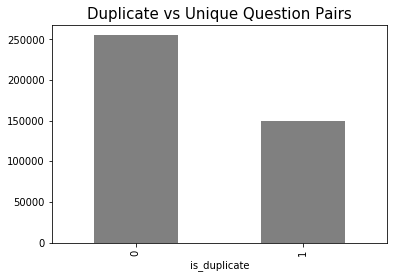

In [110]:
df.groupby("is_duplicate")['id'].count().plot.bar(color="grey").set_title('Duplicate vs Unique Question Pairs', fontsize=15)

In [111]:
# finding % of duplicate and unique question pairs
round(df['is_duplicate'].mean()*100,0)

37.0

There are 37% of duplicate and 63% of unique question pairs in the training data set.


In [112]:
# number of questions that appear more than one time in the data set
total_q = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
q_more_than_one = np.sum(total_q.value_counts()>1)
q_more_than_one

111772

In [113]:
# % of questions that appear more than one time in the data set
round(q_more_than_one/len(np.unique(total_q))*100,1)

20.8

In [114]:
# maximum number of times a single question is repeated in the data set
max(total_q.value_counts())

157

In [115]:
# ckecking if there are any repeated pairs of questions
pair_dupl = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count()
pair_dupl.shape[0] - df.shape[0]

0

Text(0, 0.5, 'Number of Questions')

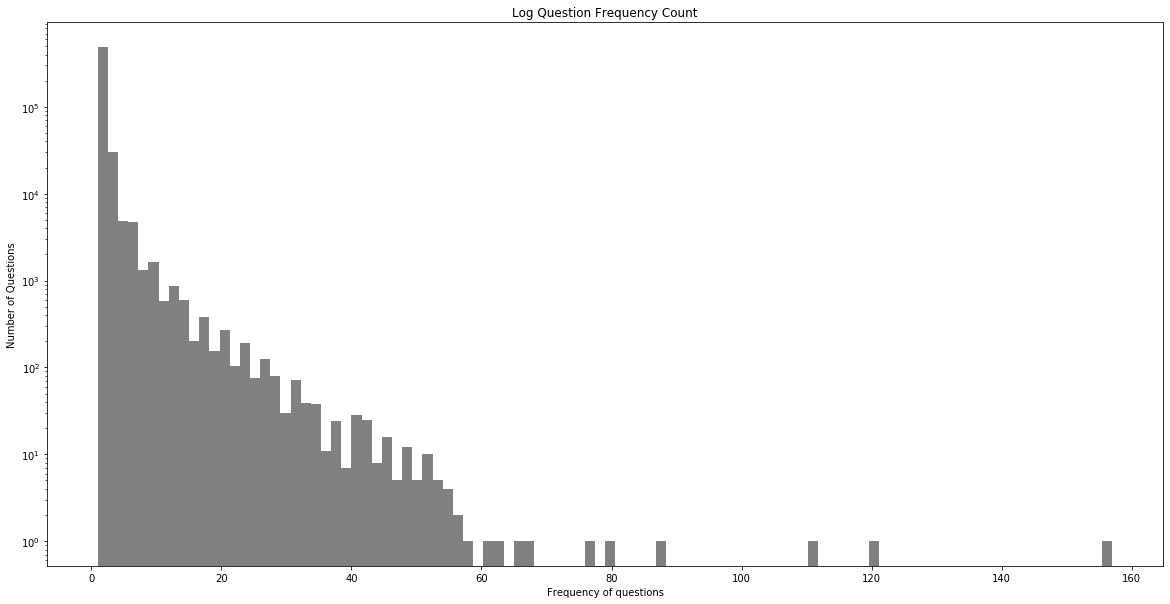

In [116]:
# Number of occurrences of each question
plt.figure(figsize = (20,10))
plt.hist(total_q.value_counts(), bins = 100, color="grey")
plt.yscale('log')
plt.title ("Log Question Frequency Count")
plt.xlabel('Frequency of questions')
plt.ylabel('Number of Questions')

### Exploring Most Frequent Words in Duplicate and Non-duplicate Question Pairs

In [117]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

In [118]:
# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
dupl = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
unique = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

In [119]:
#Saving the np array into a text file
np.savetxt('/Users/Olga/train_dup_q.txt', dupl, delimiter=' ', fmt='%s')
np.savetxt('/Users/Olga/train_un_q.txt', unique, delimiter=' ', fmt='%s')

In [120]:
# reading the text files and removing the Stop Words:
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

text_dup_q = open('/Users/Olga/train_dup_q.txt').read()
textn_un_q = open('/Users/Olga/train_un_q.txt').read()

Word Cloud for Duplicate Question pairs

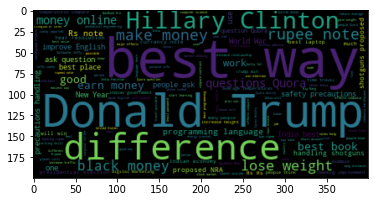

In [121]:
wc = WordCloud(max_words=len(text_dup_q))
wc.generate(text_dup_q)
plt.imshow(wc, interpolation='bilinear')
plt.show()

Word Cloud for non-Duplicate Question pairs

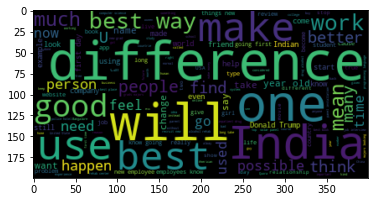

In [122]:
wc = WordCloud(max_words=len(textn_un_q))
wc.generate(textn_un_q)
plt.imshow(wc, interpolation='bilinear')
plt.show()

# Data Preparation

### Missing Vlaues Check

In [123]:
# checking missing values
df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105773,105780,174363,174364,How can I develop android app?,NaN,0
201829,201841,303951,174364,How can I create an Android app?,NaN,0
363342,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [124]:
# replacing NULL values with space
df = df.fillna('')
df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate


#### Selecting Random Balanced Subsample (n = 100000)

(100000, 6)

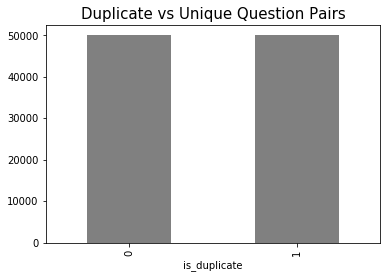

In [125]:
df = df.groupby('is_duplicate',as_index = False,group_keys=False).apply(lambda s: s.sample(50000,replace=True,random_state = 123))
df.shape
df.groupby("is_duplicate")['id'].count().plot.bar(color="grey").set_title('Duplicate vs Unique Question Pairs', fontsize=15)
df.head()
df.shape

### Pre-processing of Text 

In [126]:
# source: https://www.kaggle.com/currie32/the-importance-of-cleaning-text
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

def clean(text, stem_words=True):
    import re
    from string import punctuation

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"what's", "", text)
    text = re.sub(r"What's", "", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r" m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"60k", " 60000 ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e-mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"quikly", "quickly", text)
    text = re.sub(r" usa ", " America ", text)
    text = re.sub(r" USA ", " America ", text)
    text = re.sub(r" u s ", " America ", text)
    text = re.sub(r" uk ", " England ", text)
    text = re.sub(r" UK ", " England ", text)
    text = re.sub(r"india", "India", text)
    text = re.sub(r"switzerland", "Switzerland", text)
    text = re.sub(r"china", "China", text)
    text = re.sub(r"chinese", "Chinese", text) 
    text = re.sub(r"imrovement", "improvement", text)
    text = re.sub(r"intially", "initially", text)
    text = re.sub(r"quora", "Quora", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"demonitization", "demonetization", text) 
    text = re.sub(r"actived", "active", text)
    text = re.sub(r"kms", " kilometers ", text)
    text = re.sub(r"KMs", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text) 
    text = re.sub(r" upvotes ", " up votes ", text)
    text = re.sub(r" iPhone ", " phone ", text)
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"calender", "calendar", text)
    text = re.sub(r"ios", "operating system", text)
    text = re.sub(r"gps", "GPS", text)
    text = re.sub(r"gst", "GST", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r"bestfriend", "best friend", text)
    text = re.sub(r"dna", "DNA", text)
    text = re.sub(r"III", "3", text) 
    text = re.sub(r"the US", "America", text)
    text = re.sub(r"Astrology", "astrology", text)
    text = re.sub(r"Method", "method", text)
    text = re.sub(r"Find", "find", text) 
    text = re.sub(r"banglore", "Banglore", text)
    text = re.sub(r" J K ", " JK ", text)
    # remove comma between numbers, i.e. 15,000 -> 15000
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)
    text = re.sub('\$', " dollar ", text)
    text = re.sub('\%', " percent ", text)
    text = re.sub('\&', " and ", text)
    # indian dollar
    text = re.sub("(?<=[0-9])rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(" rs(?=[0-9])", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(r" (the[\s]+|The[\s]+)?US(A)? ", " America ", text)
    text = re.sub(r" UK ", " England ", text, flags=re.IGNORECASE)
    # replace the float numbers with a random number, it will be parsed as number afterward, and also been replaced with word "number"
    text = re.sub('[0-9]+\.[0-9]+', " 87 ", text)
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation]).lower()
    
    # Optionally, remove stop words
#     if remove_stop_words:
#         text = text.split()
#         text = [w for w in text if not w in stop_words]
#         text = " ".join(text)
    
    # Optionally, shorten words to their stems
#     if lem_words:
#         text = text.split()
#         lem = WordNetLemmatizer()
#         lem_words = [lem.lemmatize(word) for word in text]
#         text = " ".join(lem_words)
    return text
    
df['question1'] = df['question1'].apply(clean)
df['question2'] = df['question2'].apply(clean)

In [127]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
395627,395648,494699,528639,does crow see from just one eye,how far can one see with the naked eye how is ...,0
25052,25054,46729,46730,how do i unblock fortiguard application control,how can i unblock torrents,0
44746,44749,80277,80278,how can i make money off bitcoin,can you make money with bitcoin,0
28221,28223,52353,52354,who is the head of immigration officer of mala...,how do avascular plants and vascular plants di...,0
306360,306380,429895,429896,what is ionizing radiation,can you feel ionizing radiation,0


In [130]:
# to save data frame to csv
# df.to_csv('data_clean.csv')

## Feature Engineering

### Basic Feature Engeneering

num_words_q1 = Number of words in Question 1
  
num_words_q2 = Number of words in Question 2

len_q1 = Length of Q1
  
len_q2 = Length of Q2

common_words = Number of common unique words in Question 1 and Question 2
  
total_words = number of words in Q1 + number of words in Q2
  
word_share = (common_words)/(total_words)
  
 note:  token = word + stop_word

cw_min = common_words/min lenghth of word count of Q1 and Q2

cw_max = common_words/ max lenghth of word count of Q1 and Q2

cs_min = common_stop/ min lenghth of stop count of Q1 and Q2

cs_max = common_stop/ max lenghth of stop count of Q1 and Q2

ct_min = common_token/min lenghth of token count of Q1 and Q2

ct_max = common_token/max lenghth of token count of Q1 and Q2

token_len_abs = absolute token length difference

token_len_avg = Average Token Length of both Questions

In [131]:
#   number of words   
df['num_words_q1'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['num_words_q2'] = df['question2'].apply(lambda row: len(row.split(" ")))

# question length
df['len_q1'] = df['question1'].str.len() 
df['len_q2'] = df['question2'].str.len()

# common words in Q1 and Q2
def cw(row):
    cw_q1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    cw_q2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(cw_q1 & cw_q2)

def wt(row):
    wt1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    wt2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(wt1) + len(wt2))

def ws(row):
    ws1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    ws2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(ws1 & ws2)/(len(ws1) + len(ws2))
df['word_share'] = df.apply(ws, axis=1)


In [132]:
def features(q1, q2):
    token_features = [0.0]*10
    
    # converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    
    
    # getting non-stopwords
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #getting stopwords
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # getting common non-stopwords
    common_word = len(q1_words.intersection(q2_words))
    
    # getting common stopwords
    common_stop = len(q1_stops.intersection(q2_stops))
    
    # getting common tokens
    common_token = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    #  getting word lenght
    w_min_len = min(len(q1_words), len(q2_words))
    w_max_len = max(len(q1_words), len(q2_words))
                    
    #  getting word lenght        
        
    token_features[0] = common_word / ((w_min_len)+0.000000001)
    token_features[1] = common_word / ((w_max_len)+0.000000001)
    token_features[2] = common_stop / ((min(len(q1_stops), len(q2_stops))+0.000000001))
    token_features[3] = common_stop / ((max(len(q1_stops), len(q2_stops))+0.000000001))
    token_features[4] = common_token / ((min(len(q1_tokens), len(q2_tokens))+0.000000001))
    token_features[5] = common_token / ((max(len(q1_tokens), len(q2_tokens))+0.000000001))

    # getting absolute lenght of two tokens    
    token_features[6] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average token length 
    token_features[7] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

In [133]:
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words("english")
def extract_features(df):
    
    # merging features with dataset
    
    token_features = df.apply(lambda x: features(x["question1"], x["question2"]), axis=1)
    
    df["cw_min"]       = list(map(lambda x: x[0], token_features))
    df["cw_max"]       = list(map(lambda x: x[1], token_features))
    df["cs_min"]       = list(map(lambda x: x[2], token_features))
    df["cs_max"]       = list(map(lambda x: x[3], token_features))
    df["ct_min"]       = list(map(lambda x: x[4], token_features))
    df["ct_max"]       = list(map(lambda x: x[5], token_features))
    df["token_len_abs"] = list(map(lambda x: x[6], token_features))
    df["token_len_avg"] = list(map(lambda x: x[7], token_features))
    
extract_features(df)

In [134]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,num_words_q1,num_words_q2,len_q1,len_q2,word_share,cw_min,cw_max,cs_min,cs_max,ct_min,ct_max,token_len_abs,token_len_avg
395627,395648,494699,528639,does crow see from just one eye,how far can one see with the naked eye how is ...,0,8,14,32,62,0.190476,0.75,0.500000,0.000000,0.000000,0.428571,0.230769,6.0,10.0
25052,25054,46729,46730,how do i unblock fortiguard application control,how can i unblock torrents,0,8,6,48,27,0.285714,0.50,0.250000,0.666667,0.666667,0.600000,0.428571,2.0,6.0
44746,44749,80277,80278,how can i make money off bitcoin,can you make money with bitcoin,0,8,7,33,32,0.333333,1.00,1.000000,0.333333,0.250000,0.666667,0.571429,1.0,6.5
28221,28223,52353,52354,who is the head of immigration officer of mala...,how do avascular plants and vascular plants di...,0,10,9,51,51,0.058824,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,8.5
306360,306380,429895,429896,what is ionizing radiation,can you feel ionizing radiation,0,5,6,27,32,0.272727,1.00,0.666667,0.000000,0.000000,0.500000,0.400000,1.0,4.5


In [135]:
df_basic_features = df.drop(['id','qid1', 'qid2', 'question1', 'question2'], axis=1)

In [136]:
df_basic_features.head()

,is_duplicate,num_words_q1,num_words_q2,len_q1,len_q2,word_share,cw_min,cw_max,cs_min,cs_max,ct_min,ct_max,token_len_abs,token_len_avg
395627,0,8,14,32,62,0.190476,0.75,0.500000,0.000000,0.000000,0.428571,0.230769,6.0,10.0
25052,0,8,6,48,27,0.285714,0.50,0.250000,0.666667,0.666667,0.600000,0.428571,2.0,6.0
44746,0,8,7,33,32,0.333333,1.00,1.000000,0.333333,0.250000,0.666667,0.571429,1.0,6.5
28221,0,10,9,51,51,0.058824,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,8.5
306360,0,5,6,27,32,0.272727,1.00,0.666667,0.000000,0.000000,0.500000,0.400000,1.0,4.5


In [137]:
# building models based on basic features
from sklearn.model_selection import train_test_split
import scipy 
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# spliting data on train and test
X = df_basic_features.drop(['is_duplicate'],axis=1)
y = df_basic_features['is_duplicate']
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size = 0.3, random_state = 123)

models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("XGBoost", xgb.XGBClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())


/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anac

LogisticRegression 0.6816286008900398
XGBoost 0.7450000219364213
RandomForest 0.7432285552015495


In [138]:
from sklearn.metrics import roc_auc_score

# build XGboost model
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train) 
# making predictions
xgb_prediction = xgb_model.predict(X_test)

# performance assessment
print(classification_report(y_test, xgb_prediction))

print(roc_auc_score(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73     15137
           1       0.71      0.85      0.77     14863

    accuracy                           0.75     30000
   macro avg       0.76      0.75      0.75     30000
weighted avg       0.76      0.75      0.75     30000

0.7538518557576921


In [139]:
from sklearn.metrics import roc_auc_score

# build rf model
rf_model = RandomForestClassifier(max_depth=50, n_estimators=80).fit(X_train, y_train) 
# making predictions
rf_prediction = rf_model.predict(X_test)

# performance assessment
print(classification_report(y_test, rf_prediction))

print(roc_auc_score(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74     15137
           1       0.73      0.81      0.77     14863

    accuracy                           0.75     30000
   macro avg       0.76      0.76      0.75     30000
weighted avg       0.76      0.75      0.75     30000

0.7553382397485415


### Fuzzy Logic Features

In [140]:
from fuzzywuzzy import fuzz
df['fuzz_ratio'] = df.apply(lambda x: fuzz.ratio(str(x['question1']), str(x['question2'])), axis=1)
df['fuzz_partial_ratio'] = df.apply(lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2'])), axis=1)
df['fuzz_partial_token_set_ratio'] = df.apply(lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
df['fuzz_partial_token_sort_ratio'] = df.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)
df['fuzz_token_set_ratio'] = df.apply(lambda x: fuzz.token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
df['fuzz_token_sort_ratio'] = df.apply(lambda x: fuzz.token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)

In [141]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,num_words_q1,num_words_q2,len_q1,len_q2,...,ct_min,ct_max,token_len_abs,token_len_avg,fuzz_ratio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio
395627,395648,494699,528639,does crow see from just one eye,how far can one see with the naked eye how is ...,0,8,14,32,62,...,0.428571,0.230769,6.0,10.0,40,56,100,52,52,43
25052,25054,46729,46730,how do i unblock fortiguard application control,how can i unblock torrents,0,8,6,48,27,...,0.600000,0.428571,2.0,6.0,56,67,100,58,67,49
44746,44749,80277,80278,how can i make money off bitcoin,can you make money with bitcoin,0,8,7,33,32,...,0.666667,0.571429,1.0,6.5,77,82,100,77,86,76
28221,28223,52353,52354,who is the head of immigration officer of mala...,how do avascular plants and vascular plants di...,0,10,9,51,51,...,0.000000,0.000000,1.0,8.5,37,37,37,32,36,32
306360,306380,429895,429896,what is ionizing radiation,can you feel ionizing radiation,0,5,6,27,32,...,0.500000,0.400000,1.0,4.5,75,78,100,79,82,67


In [142]:
df_basic_fuzz = df.drop(['id','qid1', 'qid2', 'question1', 'question2'], axis=1)

In [143]:
df_basic_fuzz.head()

,is_duplicate,num_words_q1,num_words_q2,len_q1,len_q2,word_share,cw_min,cw_max,cs_min,cs_max,ct_min,ct_max,token_len_abs,token_len_avg,fuzz_ratio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio
395627,0,8,14,32,62,0.190476,0.75,0.500000,0.000000,0.000000,0.428571,0.230769,6.0,10.0,40,56,100,52,52,43
25052,0,8,6,48,27,0.285714,0.50,0.250000,0.666667,0.666667,0.600000,0.428571,2.0,6.0,56,67,100,58,67,49
44746,0,8,7,33,32,0.333333,1.00,1.000000,0.333333,0.250000,0.666667,0.571429,1.0,6.5,77,82,100,77,86,76
28221,0,10,9,51,51,0.058824,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,8.5,37,37,37,32,36,32
306360,0,5,6,27,32,0.272727,1.00,0.666667,0.000000,0.000000,0.500000,0.400000,1.0,4.5,75,78,100,79,82,67


In [144]:
# building models based on basic features
from sklearn.model_selection import train_test_split
import scipy 
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb


# spliting data on train and test
X = df_basic_fuzz.drop(['is_duplicate'],axis=1)
y = df_basic_fuzz['is_duplicate']
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size = 0.3, random_state = 123)

# making list of models
models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("XGBoost", xgb.XGBClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())


/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anac

LogisticRegression 0.6819856925235704
XGBoost 0.7622142633726515
RandomForest 0.7792285570529517


In [145]:
from sklearn.metrics import roc_auc_score

# build rf model
rf_model = RandomForestClassifier(max_depth=50, n_estimators=80).fit(X_train, y_train) 
# making predictions
rf_prediction = rf_model.predict(X_test)

# performance assessment
print(classification_report(y_test, rf_prediction))

print(roc_auc_score(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.84      0.70      0.77     15137
           1       0.74      0.87      0.80     14863

    accuracy                           0.78     30000
   macro avg       0.79      0.78      0.78     30000
weighted avg       0.79      0.78      0.78     30000

0.7848325067614196


In [146]:
from sklearn.metrics import roc_auc_score

# build XGboost model
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train) 
# making predictions
xgb_prediction = xgb_model.predict(X_test)

# performance assessment
print(classification_report(y_test, xgb_prediction))

print(roc_auc_score(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75     15137
           1       0.73      0.86      0.79     14863

    accuracy                           0.77     30000
   macro avg       0.78      0.77      0.77     30000
weighted avg       0.78      0.77      0.77     30000

0.7747555683878359


###  Bag of Words

In [147]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transform
count_vect = CountVectorizer(analyzer='word')
# tokenize and build vocab
count_vect.fit(pd.concat((df['question1'],df['question2'])).unique())
# encode document
trans1 = count_vect.transform(df['question1'].values)
trans2 = count_vect.transform(df['question2'].values)


In [148]:
from sklearn.model_selection import train_test_split
import scipy 
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb


# train/test split
labels = df['is_duplicate'].values
X = scipy.sparse.hstack((trans1,trans2))
y = labels
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)

# making list of models
models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("XGBoost", xgb.XGBClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())


/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anac

LogisticRegression 0.714357128046888
XGBoost 0.7268285033588616
RandomForest 0.7752142482761325


In [149]:
from sklearn.metrics import roc_auc_score

# build rf model
rf_model = RandomForestClassifier(max_depth=50, n_estimators=80).fit(X_train, y_train) 
# making predictions
rf_prediction = rf_model.predict(X_test)

# performance assessment
print(classification_report(y_test, rf_prediction))

print(roc_auc_score(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73     15137
           1       0.72      0.72      0.72     14863

    accuracy                           0.72     30000
   macro avg       0.72      0.72      0.72     30000
weighted avg       0.72      0.72      0.72     30000

0.7218900406852161


In [150]:
from sklearn.metrics import roc_auc_score

# build XGboost model
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train) 
# making predictions
xgb_prediction = xgb_model.predict(X_test)

# performance assessment
print(classification_report(y_test, xgb_prediction))

print(roc_auc_score(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77     15137
           1       0.76      0.77      0.77     14863

    accuracy                           0.77     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.77      0.77      0.77     30000

0.7691719226125134


### Bag of Words (analyzer = "char")

In [151]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transform
count_vect = CountVectorizer(analyzer='char')
# tokenize and build vocab
count_vect.fit(pd.concat((df['question1'],df['question2'])).unique())
# encode document
trans1 = count_vect.transform(df['question1'].values)
trans2 = count_vect.transform(df['question2'].values)

In [152]:
from sklearn.model_selection import train_test_split
import scipy 
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb


# train/test split
labels = df['is_duplicate'].values
X = scipy.sparse.hstack((trans1,trans2))
y = labels
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)

# making list of models
models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("XGBoost", xgb.XGBClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anac

LogisticRegression 0.6174857084153841
XGBoost 0.7212142715190658
RandomForest 0.7373714223418734


In [153]:
from sklearn.metrics import roc_auc_score

# build rf model
rf_model = RandomForestClassifier(max_depth=50, n_estimators=80).fit(X_train, y_train) 
# making predictions
rf_prediction = rf_model.predict(X_test)

# performance assessment
print(classification_report(y_test, rf_prediction))

print(roc_auc_score(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75     15137
           1       0.74      0.79      0.76     14863

    accuracy                           0.76     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.76      0.76      0.76     30000

0.758905941802763


In [154]:
from sklearn.metrics import roc_auc_score

# build XGboost model
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train) 
# making predictions
xgb_prediction = xgb_model.predict(X_test)

# performance assessment
print(classification_report(y_test, xgb_prediction))

print(roc_auc_score(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     15137
           1       0.75      0.79      0.77     14863

    accuracy                           0.77     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.77      0.77      0.77     30000

0.7678328620221657


### TF-IDF

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
tfidf_vect = TfidfVectorizer(analyzer='word')
# tokenize and build vocab
tfidf_vect.fit(pd.concat((df['question1'],df['question2'])).unique())
# encode document
trans1_tfidf = tfidf_vect.transform(df['question1'].values)
trans2_tfidf = tfidf_vect.transform(df['question2'].values)


In [156]:
from sklearn.model_selection import train_test_split
import scipy 
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb



# train/test split
labels = df['is_duplicate'].values
X = scipy.sparse.hstack((trans1_tfidf,trans2_tfidf))
y = labels
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)


models = []

models.append(("LogisticRegression",LogisticRegression()))
# models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("XGBoost", xgb.XGBClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anac

LogisticRegression 0.7237714178465905
XGBoost 0.729899971522815
RandomForest 0.7726856799077098


In [157]:
from sklearn.metrics import roc_auc_score

# build rf model
rf_model = RandomForestClassifier(max_depth=50, n_estimators=80).fit(X_train, y_train) 
# making predictions
rf_prediction = rf_model.predict(X_test)

# performance assessment
print(classification_report(y_test, rf_prediction))

print(roc_auc_score(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     15137
           1       0.75      0.68      0.71     14863

    accuracy                           0.73     30000
   macro avg       0.73      0.73      0.73     30000
weighted avg       0.73      0.73      0.73     30000

0.7258009824828455


In [158]:
from sklearn.metrics import roc_auc_score

# build XGboost model
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train) 
# making predictions
xgb_prediction = xgb_model.predict(X_test)

# performance assessment
print(classification_report(y_test, xgb_prediction))

print(roc_auc_score(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     15137
           1       0.77      0.79      0.78     14863

    accuracy                           0.78     30000
   macro avg       0.78      0.78      0.78     30000
weighted avg       0.78      0.78      0.78     30000

0.782673055513684


### TF-IDF (n-gram)

In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3),max_features=5000)
# tokenize and build vocab
tfidf_vect_ngram.fit(pd.concat((df['question1'],df['question2'])).unique())
# encode document
trans1_tfidf_ngram = tfidf_vect_ngram.transform(df['question1'].values)
trans2_tfidf_ngram = tfidf_vect_ngram.transform(df['question2'].values)

In [160]:
from sklearn.model_selection import train_test_split
import scipy 
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb


# train/test split
labels = df['is_duplicate'].values
X = scipy.sparse.hstack((trans1_tfidf_ngram,trans2_tfidf_ngram))
y = labels
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)


models = []
# building models
models.append(("LogisticRegression",LogisticRegression()))
models.append(("XGBoost", xgb.XGBClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anac

LogisticRegression 0.6770143098678241
XGBoost 0.6630856674141739
RandomForest 0.7196999451924974


In [161]:
from sklearn.metrics import roc_auc_score

# build rf model
rf_model = RandomForestClassifier(max_depth=50, n_estimators=80).fit(X_train, y_train) 
# making predictions
rf_prediction = rf_model.predict(X_test)

# performance assessment
print(classification_report(y_test, rf_prediction))

print(roc_auc_score(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.63      0.82      0.71     15137
           1       0.73      0.50      0.60     14863

    accuracy                           0.66     30000
   macro avg       0.68      0.66      0.65     30000
weighted avg       0.68      0.66      0.65     30000

0.6612373545062521


In [162]:
from sklearn.metrics import roc_auc_score

# build XGboost model
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train) 
# making predictions
xgb_prediction = xgb_model.predict(X_test)

# performance assessment
print(classification_report(y_test, xgb_prediction))

print(roc_auc_score(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.67      0.76      0.72     15137
           1       0.72      0.63      0.67     14863

    accuracy                           0.69     30000
   macro avg       0.70      0.69      0.69     30000
weighted avg       0.70      0.69      0.69     30000

0.6939832416509447


####  TF-IDF (char)

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
tfidf_vect_char = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
# tokenize and build vocab
tfidf_vect_char.fit(pd.concat((df['question1'],df['question2'])).unique())
# encode document
trans1_tfidf_char = tfidf_vect_char.transform(df['question1'].values)
trans2_tfidf_char = tfidf_vect_char.transform(df['question2'].values)


In [164]:
from sklearn.model_selection import train_test_split
import scipy 
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb


# train/test split
labels = df['is_duplicate'].values
X = scipy.sparse.hstack((trans1_tfidf_char,trans2_tfidf_char))
y = labels
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)

# building models
models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("XGBoost", xgb.XGBClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Olga/opt/anac

LogisticRegression 0.7053713876354303
XGBoost 0.7525285521441646
RandomForest 0.7691714088856573


In [165]:
from sklearn.metrics import roc_auc_score

# build rf model
rf_model = RandomForestClassifier(max_depth=50, n_estimators=80).fit(X_train, y_train) 
# making predictions
rf_prediction = rf_model.predict(X_test)

# performance assessment
print(classification_report(y_test, rf_prediction))

print(roc_auc_score(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79     15137
           1       0.79      0.77      0.78     14863

    accuracy                           0.78     30000
   macro avg       0.78      0.78      0.78     30000
weighted avg       0.78      0.78      0.78     30000

0.7835746262762692


In [166]:
from sklearn.metrics import roc_auc_score

# build XGboost model
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train) 
# making predictions
xgb_prediction = xgb_model.predict(X_test)

# performance assessment
print(classification_report(y_test, xgb_prediction))

print(roc_auc_score(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80     15137
           1       0.80      0.81      0.80     14863

    accuracy                           0.80     30000
   macro avg       0.80      0.80      0.80     30000
weighted avg       0.80      0.80      0.80     30000

0.8036285280170772


In [167]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,num_words_q1,num_words_q2,len_q1,len_q2,...,ct_min,ct_max,token_len_abs,token_len_avg,fuzz_ratio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio
395627,395648,494699,528639,does crow see from just one eye,how far can one see with the naked eye how is ...,0,8,14,32,62,...,0.428571,0.230769,6.0,10.0,40,56,100,52,52,43
25052,25054,46729,46730,how do i unblock fortiguard application control,how can i unblock torrents,0,8,6,48,27,...,0.600000,0.428571,2.0,6.0,56,67,100,58,67,49
44746,44749,80277,80278,how can i make money off bitcoin,can you make money with bitcoin,0,8,7,33,32,...,0.666667,0.571429,1.0,6.5,77,82,100,77,86,76
28221,28223,52353,52354,who is the head of immigration officer of mala...,how do avascular plants and vascular plants di...,0,10,9,51,51,...,0.000000,0.000000,1.0,8.5,37,37,37,32,36,32
306360,306380,429895,429896,what is ionizing radiation,can you feel ionizing radiation,0,5,6,27,32,...,0.500000,0.400000,1.0,4.5,75,78,100,79,82,67


In [168]:
df.to_csv('df_basic.csv')